### RFM 고객 분석
1. 식료품 구매하는 소비자들을 분석 목적
2. 오프라인과 온라인을 나눠서 분석하고 어떤 차이점이 있는지 확인하기
3. 추가적으로 오프라인에서도 대형마트와 일만 마트가 구분되기 때문에 이에 대한 분석도 가능할 듯

참고문헌: https://zephyrus1111.tistory.com/13

In [ ]:
import pandas as pd

card_filter_data = pd.read_csv("Desktop/card_data_filter.csv")

In [ ]:
# online과 offline으로 분류하기
offline = card_filter_data[card_filter_data['large_category'] == '생활/마트']
online = card_filter_data[card_filter_data['large_category'] == '온라인쇼핑']

In [ ]:
# offline의 pay_date 타입 변환하기
offline['pay_date'] = pd.to_datetime(offline['pay_date'])

In [ ]:
# 오프라인 거래 데이터에서 고객별로 최근 방문일, 방문횟수, 구매금액 기준으로 점수를 구하기
# tqdm은 for loop를 실행할 때 progress bar를 출력해주는 모듈, 이를 통해 남은 시간을 파악 가능
from tqdm import tqdm

# 중복 제거된 고객 아이디
customer_id = list(offline['person_id'].unique())

# 각 고객별로 구매금액 얼마인지 파악하기
monetary_df = pd.DataFrame() # 빈 데이터 프레임 생성
monetary_df['person_id'] = customer_id # 고객아이디 삽입

monetary_data = [] # 구매금액 담을 리스트

In [ ]:
# 고객별 총 구매금액 넣기
for ci in tqdm(customer_id):
    temp = offline.query('person_id == @ci') # 해당 아이디의 고객 데이터 추출
    amount = sum(temp['amount'])
    monetary_data.append(amount)
    
monetary_df['Monetary'] = monetary_data

In [ ]:
# recency 각 고객별 최근방문일 알아보기
temp_recency_df = offline[['person_id', 'pay_date']].drop_duplicates()
recency_df = temp_recency_df.groupby('person_id')['pay_date'].max().reset_index()
recency_df = recency_df.rename(columns = {'pay_date': 'Recency'})

In [ ]:
# Frequency 각 고객별 방문횟수를 알아보기
temp_frequency_df = offline[['person_id', 'pay_date']].drop_duplicates()
frequency_df = temp_frequency_df.groupby('person_id')['pay_date'].nunique().reset_index()
frequency_df = frequency_df.rename(columns = {'paydate' : 'Frequency'})

In [ ]:
# monetary_df 칼럼명 변경하기
monetary_df = monetary_df.rename(columns = {'Customer_ID' : 'person_id'})

In [ ]:
# 각 df 병합하기
rfm_df = pd.merge(recency_df, frequency_df, how = 'left', on = 'person_id')
rfm_df = pd.merge(rfm_df, monetary_df, how = 'left', on = 'person_id')

In [ ]:
# F, M은 정수형태라 점수를 매기기 쉽지만, R는 날짜 형식이라 점수를 매기는데 무리가 있다. 따라서 추가적인 작업 필요
# 1단계: 기준시간 설정 / 2단계: 시간차이 계산 / 3단계 초단위로 변환
rfm_df.info()

In [ ]:
rfm_df

In [ ]:
# 기준시간은 어떻게 잡을까?
# 시간의 크기는 크게 잡는다. 이유는 빈도, 가격 또한 클수록 큰 점수를 부여하기 때문에 동일하게 설정
# 2022-06-01로 설정 Recency의 min: 2022-07-01 max: 2023-06-30

current_day = pd.to_datetime('20220601')
time_diff = rfm_df['Recency']-current_day
time_in_seconds = [x.total_seconds() for x in time_diff] # total_seconds() 함수는 시간 차이를 초단위로 변환해준다.
rfm_df['Recency'] = time_in_seconds # 데이터 삽입하기

In [ ]:
rfm_df.to_csv("Desktop/rfm_df.csv")

In [ ]:
from tqdm import tqdm
rfm_df = pd.read_csv("Desktop/rfm_df.csv")

In [ ]:
rfm_df

In [ ]:
# online의 pay_date 타입 변환하기
online['pay_date'] = pd.to_datetime(online['pay_date'])

In [ ]:
# 온라인 거래 데이터에서 고객별로 최근 방문일, 방문횟수, 구매금액 기준으로 점수를 구하기
# tqdm은 for loop를 실행할 때 progress bar를 출력해주는 모듈, 이를 통해 남은 시간을 파악 가능
from tqdm import tqdm

# 중복 제거된 고객 아이디
customer_id = list(online['person_id'].unique())

# 각 고객별로 구매금액 얼마인지 파악하기
monetary_df = pd.DataFrame() # 빈 데이터 프레임 생성
monetary_df['person_id'] = customer_id # 고객아이디 삽입

monetary_data = [] # 구매금액 담을 리스트

In [ ]:
# 고객별 총 구매금액 넣기
for ci in tqdm(customer_id):
    temp = online.query('person_id == @ci') # 해당 아이디의 고객 데이터 추출
    amount = sum(temp['amount'])
    monetary_data.append(amount)
    
monetary_df['Monetary'] = monetary_data

In [ ]:
# recency 각 고객별 최근방문일 알아보기
temp_recency_df = online[['person_id', 'pay_date']].drop_duplicates()
recency_df = temp_recency_df.groupby('person_id')['pay_date'].max().reset_index()
recency_df = recency_df.rename(columns = {'pay_date': 'Recency'})

In [ ]:
# Frequency 각 고객별 방문횟수를 알아보기
temp_frequency_df = online[['person_id', 'pay_date']].drop_duplicates()
frequency_df = temp_frequency_df.groupby('person_id')['pay_date'].nunique().reset_index()
frequency_df = frequency_df.rename(columns = {'paydate' : 'Frequency'})

In [ ]:
# 각 df 병합하기
rfm_df = pd.merge(recency_df, frequency_df, how = 'left', on = 'person_id')
rfm_df = pd.merge(rfm_df, monetary_df, how = 'left', on = 'person_id')

In [ ]:
# Recency 변환하기
current_date = pd.to_datetime("20230701")
time_diff = current_date - rfm_df['Recency']
time_diff_days = [x.days for x in time_diff]
rfm_df['Recency'] = time_diff_days

In [ ]:
# 성별, 나이 추가하기
info_df = online[['person_id', 'age_group', 'person_gender']].drop_duplicates()

In [ ]:
rfm_online = pd.merge(rfm_df, info_df, how = 'left', on = 'person_id')

In [ ]:
rfm_online.to_csv("Desktop/rfm_online.csv")

### RFM_offline 데이터 추가하기
> 기존 RFM 값에서 성별, 연령 추가

In [ ]:
rfm_offline = pd.read_csv("Desktop/rfm_offline.csv")
rfm_offline.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
info_off = offline[['person_id', 'age_group', 'person_gender']].drop_duplicates()

In [ ]:
rfm_offline = pd.merge(rfm_offline, info_off, how = 'left', on = 'person_id')

In [ ]:
rfm_offline.to_csv("Desktop/rfm_offline.csv")

In [ ]:
rfm_offline

### 편의점 RFM 고객 분석

In [4]:
# pay_date 데이터 타입 변환하기
convenience_df['pay_date'] = pd.to_datetime(convenience_df['pay_date'])

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_22727/2325656816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  convenience_df['pay_date'] = pd.to_datetime(convenience_df['pay_date'])


In [5]:
# 중복 제거된 고객 아이디
customer_id = list(convenience_df['person_id'].unique())

# 고객별 구매금액 얼마인지 파악하기
monetary_df = pd.DataFrame()
monetary_df['person_id'] = customer_id

monetary_data = [] # 구매금액 담을 리스트

In [6]:
# 고객별 총 구매금액 구하기
for ci in tqdm(customer_id):
    temp = convenience_df.query('person_id == @ci')
    amount = sum(temp['amount'])
    monetary_data.append(amount)
    
monetary_df['Monetary'] = monetary_data

100%|█████████████████████████████████████| 39317/39317 [43:54<00:00, 14.92it/s]


In [7]:
# recency 각 고객별 최근방문일 알아보기
temp_recency_df = convenience_df[['person_id', 'pay_date']].drop_duplicates()
recency_df = temp_recency_df.groupby('person_id')['pay_date'].max().reset_index()
recency_df = recency_df.rename(columns = {'pay_date' : 'Recency'})

In [8]:
# Frequency 각 고객별 방문횟수 알아보기
temp_frequency_df = convenience_df[['person_id', 'pay_date']].drop_duplicates()
frequency_df = temp_frequency_df.groupby('person_id')['pay_date'].nunique().reset_index()
frequency_df = frequency_df.rename(columns = {'pay_date' : 'Frequency'})

In [10]:
# 각 df 병합하기
convenience_rfm = pd.merge(recency_df, frequency_df, how = 'left', on = 'person_id')
convenience_rfm = pd.merge(convenience_rfm, monetary_df, how = 'left', on = 'person_id')

In [11]:
# Recency day로 변환하기

# 최근 날짜 설정
current_date = pd.to_datetime('20230701')

# 날짜 차이 구하기
time_diff = current_date - convenience_rfm['Recency']

# 날짜 day로 변환
time_in_days = [x.days for x in time_diff]

# 변환한 날짜로 교체하기
convenience_rfm['Recency'] = time_in_days

In [12]:
# 성별 / 나이 / 편의점 추가하기
info_df = convenience_df[['person_id', 'age_group', 'person_gender']].drop_duplicates()

convenience_rfm = pd.merge(convenience_rfm, info_df, how = 'left', on = 'person_id')

In [14]:
convenience_rfm['category'] = '편의점'

In [17]:
convenience_rfm.to_csv("Desktop/convenience_rfm.csv")

### 대형마트 RFM 고객 분석

In [18]:
# pay_date 데이터 타입 변환하기
bigmart_df['pay_date'] = pd.to_datetime(bigmart_df['pay_date'])

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_22727/749407137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigmart_df['pay_date'] = pd.to_datetime(bigmart_df['pay_date'])


In [19]:
# 중복 제거된 고객 아이디
customer_id = list(bigmart_df['person_id'].unique())

# 고객별 구매금액 얼마인지 파악하기
monetary_df = pd.DataFrame()
monetary_df['person_id'] = customer_id

monetary_data = [] # 구매금액 담을 리스트

In [20]:
# 고객별 총 구매금액 구하기
for ci in tqdm(customer_id):
    temp = bigmart_df.query('person_id == @ci')
    amount = sum(temp['amount'])
    monetary_data.append(amount)
    
monetary_df['Monetary'] = monetary_data

100%|█████████████████████████████████████| 32485/32485 [12:18<00:00, 44.00it/s]


In [21]:
# recency 각 고객별 최근방문일 알아보기
temp_recency_df = bigmart_df[['person_id', 'pay_date']].drop_duplicates()
recency_df = temp_recency_df.groupby('person_id')['pay_date'].max().reset_index()
recency_df = recency_df.rename(columns = {'pay_date' : 'Recency'})

In [22]:
# Frequency 각 고객별 방문횟수 알아보기
temp_frequency_df = bigmart_df[['person_id', 'pay_date']].drop_duplicates()
frequency_df = temp_frequency_df.groupby('person_id')['pay_date'].nunique().reset_index()
frequency_df = frequency_df.rename(columns = {'pay_date' : 'Frequency'})

In [23]:
# 각 df 병합하기
bigmart_rfm = pd.merge(recency_df, frequency_df, how = 'left', on = 'person_id')
bigmart_rfm = pd.merge(bigmart_rfm, monetary_df, how = 'left', on = 'person_id')

In [24]:
# Recency day로 변환하기

# 최근 날짜 설정
current_date = pd.to_datetime('20230701')

# 날짜 차이 구하기
time_diff = current_date - bigmart_rfm['Recency']

# 날짜 day로 변환
time_in_days = [x.days for x in time_diff]

# 변환한 날짜로 교체하기
bigmart_rfm['Recency'] = time_in_days

In [25]:
# 성별 / 나이 / 편의점 추가하기
info_df = bigmart_df[['person_id', 'age_group', 'person_gender']].drop_duplicates()

bigmart_rfm = pd.merge(bigmart_rfm, info_df, how = 'left', on = 'person_id')

bigmart_rfm['category'] = '대형마트'

In [27]:
bigmart_rfm.to_csv("Desktop/bigmart_rfm.csv")

### 마트 RFM 고객 분석

In [28]:
# pay_date 데이터 타입 변환하기
smallmart_df['pay_date'] = pd.to_datetime(smallmart_df['pay_date'])

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_22727/504847289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smallmart_df['pay_date'] = pd.to_datetime(smallmart_df['pay_date'])


In [29]:
# 중복 제거된 고객 아이디
customer_id = list(smallmart_df['person_id'].unique())

# 고객별 구매금액 얼마인지 파악하기
monetary_df = pd.DataFrame()
monetary_df['person_id'] = customer_id

monetary_data = [] # 구매금액 담을 리스트

In [30]:
# 고객별 총 구매금액 구하기
for ci in tqdm(customer_id):
    temp = smallmart_df.query('person_id == @ci')
    amount = sum(temp['amount'])
    monetary_data.append(amount)
    
monetary_df['Monetary'] = monetary_data

100%|█████████████████████████████████████| 32248/32248 [12:55<00:00, 41.61it/s]


In [31]:
# recency 각 고객별 최근방문일 알아보기
temp_recency_df = smallmart_df[['person_id', 'pay_date']].drop_duplicates()
recency_df = temp_recency_df.groupby('person_id')['pay_date'].max().reset_index()
recency_df = recency_df.rename(columns = {'pay_date' : 'Recency'})

In [32]:
# Frequency 각 고객별 방문횟수 알아보기
temp_frequency_df = smallmart_df[['person_id', 'pay_date']].drop_duplicates()
frequency_df = temp_frequency_df.groupby('person_id')['pay_date'].nunique().reset_index()
frequency_df = frequency_df.rename(columns = {'pay_date' : 'Frequency'})

In [33]:
# 각 df 병합하기
smallmart_rfm = pd.merge(recency_df, frequency_df, how = 'left', on = 'person_id')
smallmart_rfm = pd.merge(smallmart_rfm, monetary_df, how = 'left', on = 'person_id')

In [34]:
# Recency day로 변환하기

# 최근 날짜 설정
current_date = pd.to_datetime('20230701')

# 날짜 차이 구하기
time_diff = current_date - smallmart_rfm['Recency']

# 날짜 day로 변환
time_in_days = [x.days for x in time_diff]

# 변환한 날짜로 교체하기
smallmart_rfm['Recency'] = time_in_days

In [35]:
# 성별 / 나이 / 편의점 추가하기
info_df = smallmart_df[['person_id', 'age_group', 'person_gender']].drop_duplicates()

smallmart_rfm = pd.merge(smallmart_rfm, info_df, how = 'left', on = 'person_id')

smallmart_rfm['category'] = '슈퍼마켓'

In [39]:
smallmart_rfm.to_csv("Desktop/smallmart_rfm.csv")

### RFM 각 변수에 대한 점수별 기준 산정
참고자료: https://stelch.tistory.com/pages/CRM-RFM-%EA%B3%A0%EA%B0%9D%EA%B0%80%EC%B9%98%EB%B6%84%EC%84%9D-feat-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%99%9C%EC%9A%A9

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from datetime import datetime
from tqdm import tqdm

# 데이터 불러오기
c_rfm = pd.read_csv("Desktop/convenience_rfm.csv")
b_rfm = pd.read_csv("Desktop/bigmart_rfm.csv")
s_rfm = pd.read_csv("Desktop/smallmart_rfm.csv")

In [5]:
# 편의점 최근 구매 날짜
# 평균적으로 고객 한 명당 최근에 구매한 날짜는 109일 전
c_rfm.Recency.describe()

count    39317.000000
mean       109.907012
std        120.883694
min          1.000000
25%          6.000000
50%         44.000000
75%        219.000000
max        365.000000
Name: Recency, dtype: float64

/Users/jjeori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


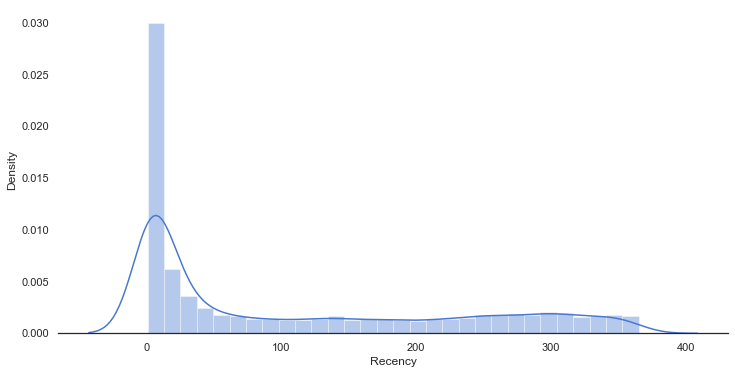

In [104]:
# 시간 차이의 흐름 시각화
sns.set(palette = 'muted', color_codes = True, style = 'white')
fig, ax = plt.subplots(figsize = (12, 6))
sns.despine(left = True)
sns.distplot(c_rfm['Recency'], bins = 30)
plt.show()

# 최근 결제 수가 많다는 걸 알 수 있다.

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/325185615.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/325185615.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/325185615.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

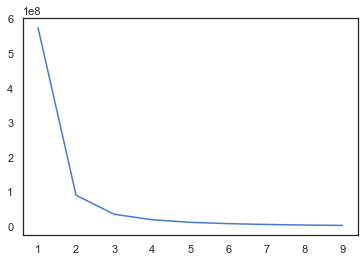

In [105]:
# kmeans 계산하기 위한 elbow point구하기
from sklearn.cluster import KMeans

point = {}
df_recency = c_rfm[['Recency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_recency)
    df_recency['cluster'] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.plot(list(point.keys()), list(point.values()))
plt.show()

In [106]:
# 위 그래프를 통해서 elbow point는 4인 지점으로 설정
kmeans = KMeans(n_clusters = 4)
kmeans.fit(c_rfm[['Recency']])
c_rfm['Recencycluster'] = kmeans.predict(c_rfm[['Recency']])

# cluster 분석 모형
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by = target_field_name, ascending = ascending).reset_index(drop = True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on = cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis = 1)
    df_final = df_final.rename(columns = {"index" : cluster_field_name})
    return df_final

c_rfm = order_cluster('Recencycluster', 'Recency', c_rfm, False)
c_rfm.groupby('Recencycluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Recencycluster,,,,,,,,
0,6766.0,315.354863,27.826282,268.0,292.0,314.0,339.0,365.0
1,5749.0,220.245086,29.703111,167.0,194.0,223.0,247.0,267.0
2,5652.0,114.281847,29.976792,64.0,88.0,115.0,140.0,166.0
3,21147.0,13.021563,15.249252,1.0,2.0,6.0,18.0,63.0


In [107]:
# Frequency 도출을 위한 데이터 추출
c_rfm.Frequency.describe()

count    39314.000000
mean        39.734013
std         50.469201
min          1.000000
25%          6.000000
50%         21.000000
75%         52.000000
max        364.000000
Name: Frequency, dtype: float64

/Users/jjeori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


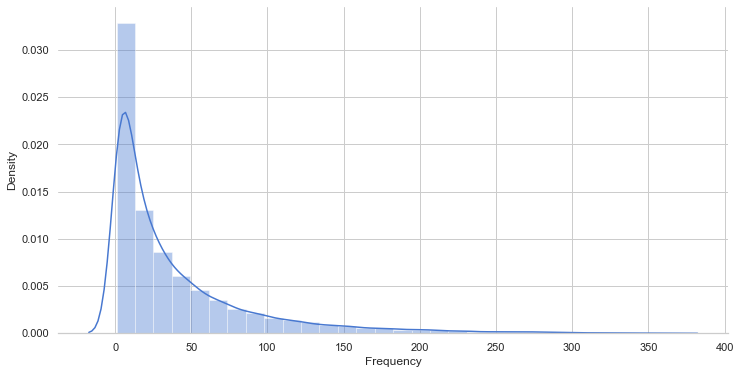

In [108]:
# 구매 빈도의 흐름 시각화
sns.set(palette = 'muted', color_codes = True, style = 'whitegrid')
fig, ax = plt.subplots(figsize = (12, 6))
sns.despine(left = True)
sns.distplot(c_rfm['Frequency'], bins = 30)
plt.show()

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/460856203.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/460856203.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/460856203.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

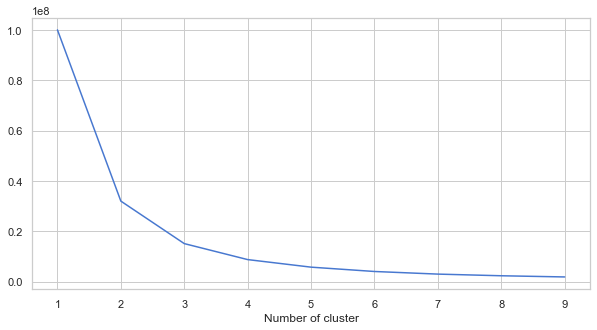

In [109]:
# kmeans 계산하기 위한 elbow point구하기
from sklearn.cluster import KMeans

point = {}
df_frequency = c_rfm[['Frequency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_frequency)
    df_frequency['cluster'] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.figure(figsize = (10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel("Number of cluster")
plt.show()

In [110]:
# 위 그래프를 통해서 elbow point는 4인 지점으로 설정
kmeans = KMeans(n_clusters = 4)
kmeans.fit(c_rfm[['Frequency']])
c_rfm['Frequencycluster'] = kmeans.predict(c_rfm[['Frequency']])

c_rfm = order_cluster('Frequencycluster', 'Frequency', c_rfm, True)
c_rfm.groupby('Frequencycluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequencycluster,,,,,,,,
0,24118.0,11.088938,8.769503,1.0,3.0,9.0,18.0,31.0
1,9705.0,52.490881,14.738408,32.0,40.0,50.0,64.0,84.0
2,4106.0,116.473210,23.318666,85.0,96.0,112.0,134.0,169.0
3,1385.0,221.658484,42.952029,170.0,187.0,210.0,250.0,364.0


In [111]:
# Monetary 도출을 위한 데이터 추출
c_rfm.Monetary.describe()

count    3.931400e+04
mean     3.389647e+05
std      5.633172e+05
min      1.000000e+03
25%      4.100000e+04
50%      1.400000e+05
75%      3.930000e+05
max      1.401900e+07
Name: Monetary, dtype: float64

/Users/jjeori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


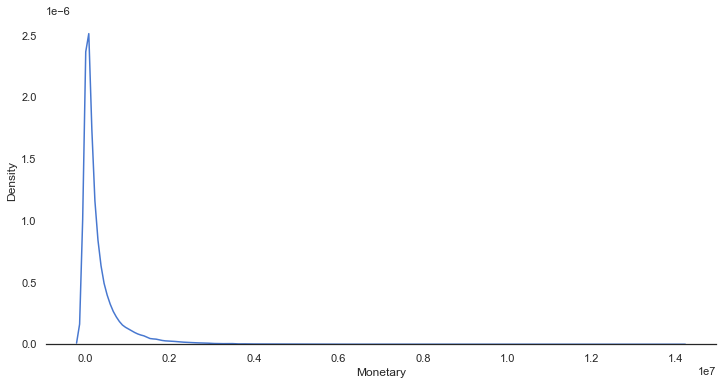

In [112]:
# 구매 빈도의 흐름 시각화
sns.set(palette = 'muted', color_codes = True, style = 'white')
fig, ax = plt.subplots(figsize = (12, 6))
sns.despine(left = True)
sns.distplot(c_rfm['Monetary'], hist = False)
plt.show()

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/705172312.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetary['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/705172312.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetary['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/705172312.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

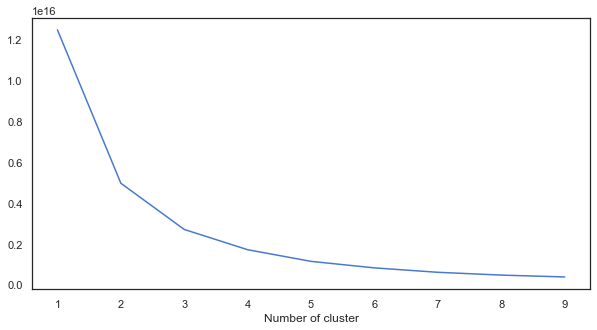

In [113]:
# kmeans 계산하기 위한 elbow point구하기
from sklearn.cluster import KMeans

point = {}
df_monetary = c_rfm[['Monetary']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_monetary)
    df_monetary['cluster'] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.figure(figsize = (10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel("Number of cluster")
plt.show()

In [114]:
# 위 그래프를 통해서 elbow point는 4인 지점으로 설정
kmeans = KMeans(n_clusters = 4)
kmeans.fit(c_rfm[['Monetary']])
c_rfm['Monetarycluster'] = kmeans.predict(c_rfm[['Monetary']])

c_rfm = order_cluster('Monetarycluster', 'Monetary', c_rfm, True)
c_rfm.groupby('Monetarycluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
Monetarycluster,,,,,,,,
0,29941.0,1.199555e+05,1.104065e+05,1000.0,28000.0,83000.0,188000.0,413000.0
1,7170.0,7.079558e+05,2.295649e+05,414000.0,515000.0,652000.0,867000.0,1262000.0
2,1936.0,1.818054e+06,4.587393e+05,1263000.0,1428750.0,1687500.0,2114000.0,3035000.0
3,267.0,4.264700e+06,1.454173e+06,3042000.0,3361000.0,3769000.0,4534000.0,14019000.0


In [90]:
c_rfm.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [115]:
c_rfm.to_csv("Desktop/convenience_rfm.csv")

### 대형마트 RFM 점수 산정

In [52]:
# 대형마트 최근 구매 날짜
# 평균적으로 고객 한 명당 최근에 구매한 날짜는 123일 전
b_rfm.Recency.describe()

count    32485.000000
mean       123.559766
std        117.388042
min          1.000000
25%         16.000000
50%         79.000000
75%        224.000000
max        365.000000
Name: Recency, dtype: float64

/Users/jjeori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


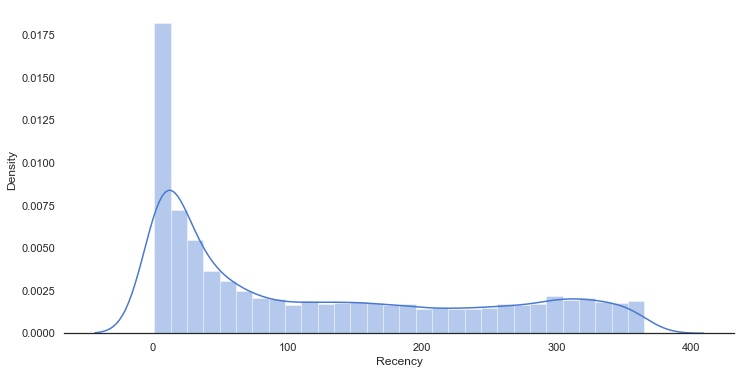

In [53]:
# 시간 차이의 흐름 시각화
sns.set(palette = 'muted', color_codes = True, style = 'white')
fig, ax = plt.subplots(figsize = (12, 6))
sns.despine(left = True)
sns.distplot(b_rfm['Recency'], bins = 30)
plt.show()

# 최근 결제 수가 많다는 걸 알 수 있다.

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/3714228198.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/3714228198.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/3714228198.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

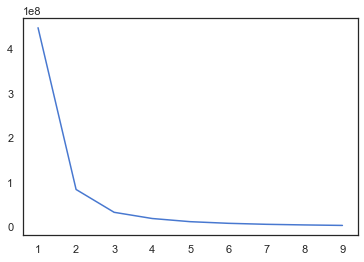

In [54]:
# kmeans 계산하기 위한 elbow point구하기
from sklearn.cluster import KMeans

point = {}
df_recency = b_rfm[['Recency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_recency)
    df_recency['cluster'] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.plot(list(point.keys()), list(point.values()))
plt.show()

In [55]:
# 위 그래프를 통해서 elbow point는 4인 지점으로 설정
kmeans = KMeans(n_clusters = 4)
kmeans.fit(b_rfm[['Recency']])
b_rfm['Recencycluster'] = kmeans.predict(b_rfm[['Recency']])

b_rfm = order_cluster('Recencycluster', 'Recency', b_rfm, False)
b_rfm.groupby('Recencycluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Recencycluster,,,,,,,,
0,6066.0,316.021925,27.961887,266.0,294.0,316.0,339.0,365.0
1,5005.0,215.102298,29.400742,166.0,189.0,215.0,241.0,265.0
2,5902.0,116.172145,28.418350,70.0,91.0,117.0,141.0,165.0
3,15512.0,21.571364,18.805862,1.0,6.0,15.0,33.0,69.0


In [56]:
# Frequency 도출을 위한 데이터 추출
b_rfm.Frequency.describe()

count    32485.000000
mean        13.649654
std         20.197018
min          1.000000
25%          2.000000
50%          6.000000
75%         16.000000
max        287.000000
Name: Frequency, dtype: float64

/Users/jjeori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


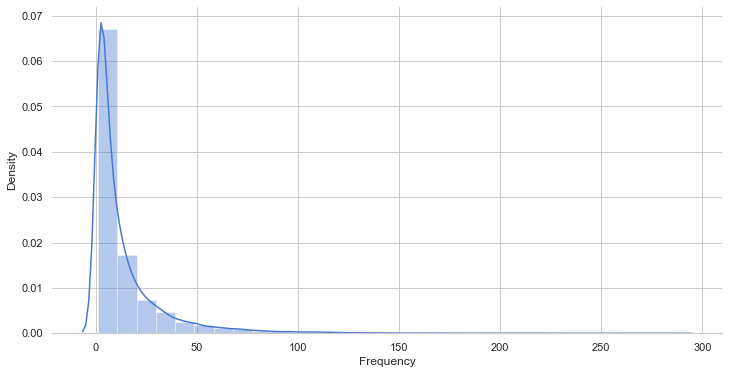

In [58]:
# 구매 빈도의 흐름 시각화
sns.set(palette = 'muted', color_codes = True, style = 'whitegrid')
fig, ax = plt.subplots(figsize = (12, 6))
sns.despine(left = True)
sns.distplot(b_rfm['Frequency'], bins = 30)
plt.show()

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/780887470.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/780887470.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/780887470.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

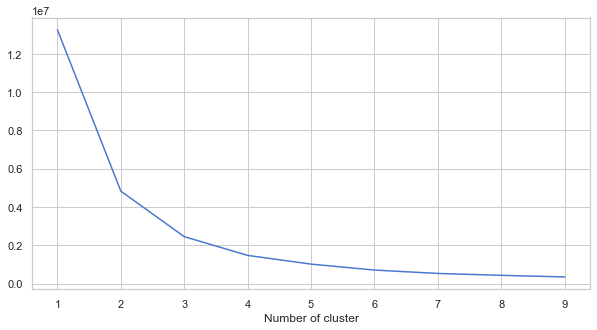

In [59]:
# kmeans 계산하기 위한 elbow point구하기
from sklearn.cluster import KMeans

point = {}
df_frequency = b_rfm[['Frequency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_frequency)
    df_frequency['cluster'] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.figure(figsize = (10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel("Number of cluster")
plt.show()

In [60]:
# 위 그래프를 통해서 elbow point는 4인 지점으로 설정
kmeans = KMeans(n_clusters = 4)
kmeans.fit(b_rfm[['Frequency']])
b_rfm['Frequencycluster'] = kmeans.predict(b_rfm[['Frequency']])

b_rfm = order_cluster('Frequencycluster', 'Frequency', b_rfm, True)
b_rfm.groupby('Frequencycluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequencycluster,,,,,,,,
0,22958.0,4.650928,3.529763,1.0,2.0,4.0,7.0,13.0
1,6899.0,22.946224,7.097374,14.0,17.0,21.0,28.0,39.0
2,2160.0,56.356481,12.943271,40.0,45.0,53.0,65.0,88.0
3,468.0,120.933761,31.863969,89.0,98.0,111.0,133.0,287.0


In [61]:
# Monetary 도출을 위한 데이터 추출
b_rfm.Monetary.describe()

count    3.248500e+04
mean     2.789659e+05
std      4.428213e+05
min      1.000000e+03
25%      4.100000e+04
50%      1.210000e+05
75%      3.280000e+05
max      1.557000e+07
Name: Monetary, dtype: float64

/Users/jjeori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


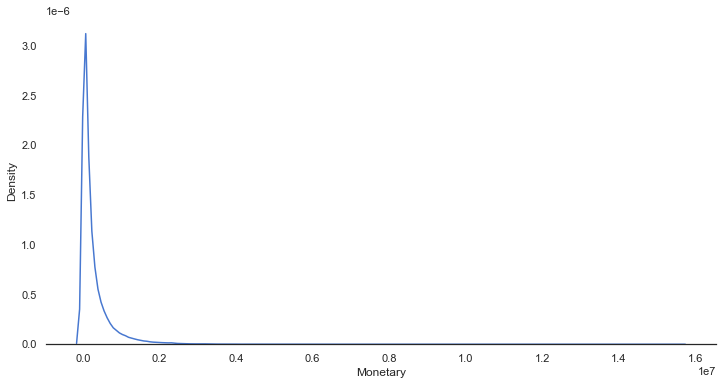

In [62]:
# 구매 빈도의 흐름 시각화
sns.set(palette = 'muted', color_codes = True, style = 'white')
fig, ax = plt.subplots(figsize = (12, 6))
sns.despine(left = True)
sns.distplot(b_rfm['Monetary'], hist = False)
plt.show()

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/4091499729.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetary['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/4091499729.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetary['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/4091499729.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

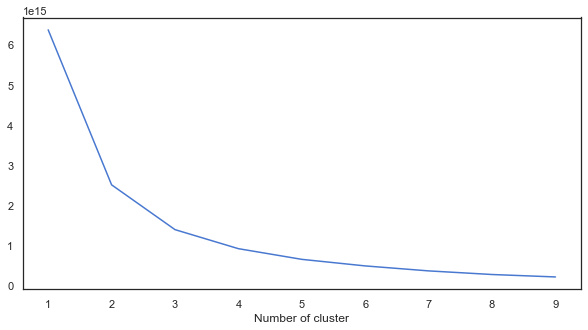

In [63]:
# kmeans 계산하기 위한 elbow point구하기
from sklearn.cluster import KMeans

point = {}
df_monetary = b_rfm[['Monetary']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_monetary)
    df_monetary['cluster'] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.figure(figsize = (10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel("Number of cluster")
plt.show()

In [64]:
# 위 그래프를 통해서 elbow point는 4인 지점으로 설정
kmeans = KMeans(n_clusters = 4)
kmeans.fit(b_rfm[['Monetary']])
b_rfm['Monetarycluster'] = kmeans.predict(b_rfm[['Monetary']])

b_rfm = order_cluster('Monetarycluster', 'Monetary', b_rfm, True)
b_rfm.groupby('Monetarycluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
Monetarycluster,,,,,,,,
0,24149.0,9.841364e+04,8.388597e+04,1000.0,30000.0,72000.0,151000.0,317000.0
1,6186.0,5.363873e+05,1.654008e+05,318000.0,394000.0,500000.0,654000.0,927000.0
2,1801.0,1.316483e+06,3.032577e+05,928000.0,1063000.0,1246000.0,1518000.0,2087000.0
3,349.0,2.855413e+06,1.088898e+06,2089000.0,2281000.0,2515000.0,3097000.0,15570000.0


In [88]:
b_rfm.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [89]:
b_rfm.to_csv("Desktop/bigmart_rfm.csv")

### 슈퍼마켓 RFM 점수 산정

In [68]:
# 편의점 최근 구매 날짜
# 평균적으로 고객 한 명당 최근에 구매한 날짜는 125일 전
s_rfm.Recency.describe()

count    32248.000000
mean       125.588936
std        117.989379
min          1.000000
25%         17.000000
50%         83.000000
75%        231.000000
max        365.000000
Name: Recency, dtype: float64

/Users/jjeori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


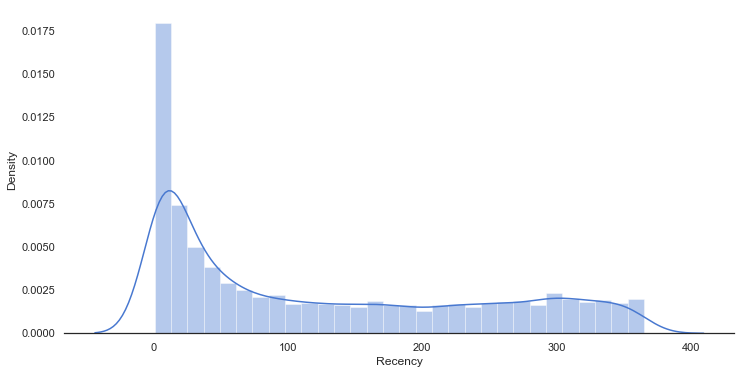

In [69]:
# 시간 차이의 흐름 시각화
sns.set(palette = 'muted', color_codes = True, style = 'white')
fig, ax = plt.subplots(figsize = (12, 6))
sns.despine(left = True)
sns.distplot(s_rfm['Recency'], bins = 30)
plt.show()

# 최근 결제 수가 많다는 걸 알 수 있다.

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/178582060.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/178582060.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/178582060.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

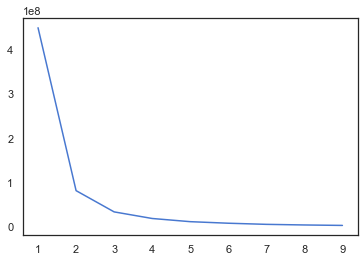

In [70]:
# kmeans 계산하기 위한 elbow point구하기
from sklearn.cluster import KMeans

point = {}
df_recency = s_rfm[['Recency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_recency)
    df_recency['cluster'] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.plot(list(point.keys()), list(point.values()))
plt.show()

In [71]:
# 위 그래프를 통해서 elbow point는 4인 지점으로 설정
kmeans = KMeans(n_clusters = 4)
kmeans.fit(s_rfm[['Recency']])
s_rfm['Recencycluster'] = kmeans.predict(s_rfm[['Recency']])


s_rfm = order_cluster('Recencycluster', 'Recency', s_rfm, False)
s_rfm.groupby('Recencycluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Recencycluster,,,,,,,,
0,6065.0,315.934707,27.957463,267.0,293.0,315.0,340.0,365.0
1,5265.0,217.666287,29.539618,166.0,191.0,219.0,244.0,266.0
2,5881.0,114.204047,28.994009,68.0,89.0,113.0,140.0,165.0
3,15037.0,21.028197,18.430095,1.0,6.0,15.0,33.0,67.0


In [72]:
# Frequency 도출을 위한 데이터 추출
s_rfm.Frequency.describe()

count    32248.000000
mean        13.989085
std         22.235061
min          1.000000
25%          2.000000
50%          6.000000
75%         16.000000
max        320.000000
Name: Frequency, dtype: float64

/Users/jjeori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


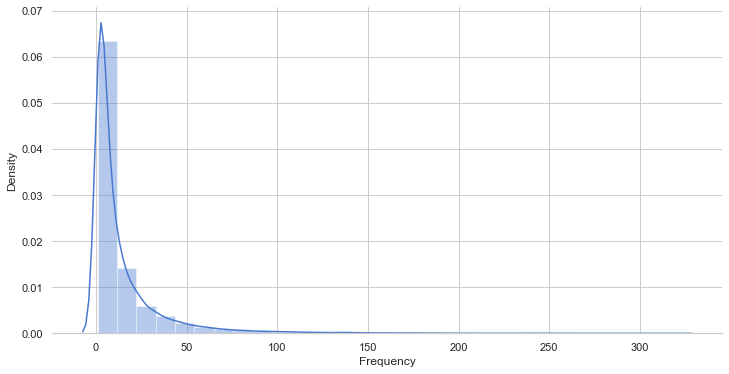

In [83]:
# 구매 빈도의 흐름 시각화
sns.set(palette = 'muted', color_codes = True, style = 'whitegrid')
fig, ax = plt.subplots(figsize = (12, 6))
sns.despine(left = True)
sns.distplot(s_rfm['Frequency'], bins = 30)
plt.show()

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/2259815604.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/2259815604.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/2259815604.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


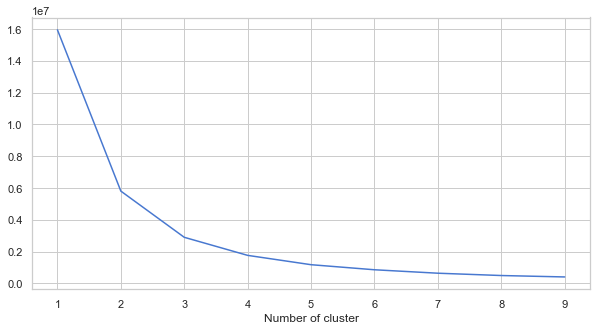

In [74]:
# kmeans 계산하기 위한 elbow point구하기
from sklearn.cluster import KMeans

point = {}
df_frequency = s_rfm[['Frequency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_frequency)
    df_frequency['cluster'] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.figure(figsize = (10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel("Number of cluster")
plt.show()

In [75]:
# 위 그래프를 통해서 elbow point는 4인 지점으로 설정
kmeans = KMeans(n_clusters = 4)
kmeans.fit(s_rfm[['Frequency']])
s_rfm['Frequencycluster'] = kmeans.predict(s_rfm[['Frequency']])

s_rfm = order_cluster('Frequencycluster', 'Frequency', s_rfm, True)
s_rfm.groupby('Frequencycluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequencycluster,,,,,,,,
0,24050.0,4.935884,3.951719,1.0,2.0,4.0,7.0,15.0
1,5802.0,25.680972,7.622815,16.0,19.0,24.0,31.0,43.0
2,1927.0,62.132849,14.679900,44.0,50.0,58.0,72.0,98.0
3,469.0,135.780384,36.623120,99.0,109.0,125.0,149.0,320.0


In [76]:
# Monetary 도출을 위한 데이터 추출
c_rfm.Monetary.describe()

count    3.931700e+04
mean     3.412692e+05
std      6.305631e+05
min      1.000000e+03
25%      4.100000e+04
50%      1.400000e+05
75%      3.930000e+05
max      4.462500e+07
Name: Monetary, dtype: float64

/Users/jjeori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


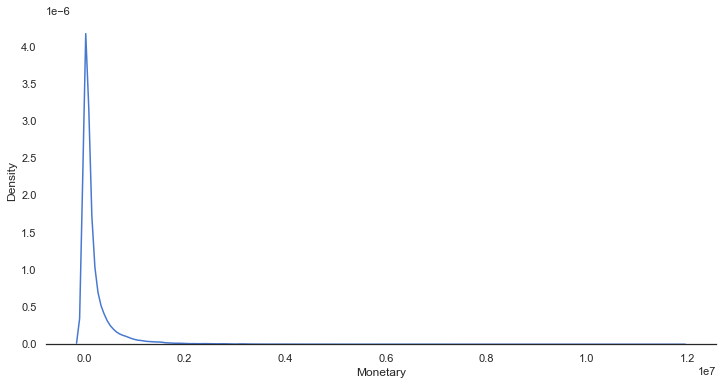

In [77]:
# 구매 빈도의 흐름 시각화
sns.set(palette = 'muted', color_codes = True, style = 'white')
fig, ax = plt.subplots(figsize = (12, 6))
sns.despine(left = True)
sns.distplot(s_rfm['Monetary'], hist = False)
plt.show()

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/1983227630.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetary['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/1983227630.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetary['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_24268/1983227630.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

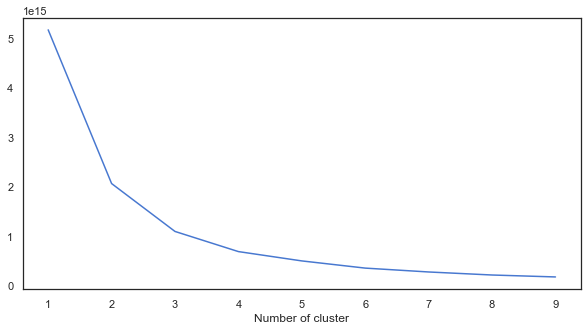

In [78]:
# kmeans 계산하기 위한 elbow point구하기
from sklearn.cluster import KMeans

point = {}
df_monetary = s_rfm[['Monetary']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_monetary)
    df_monetary['cluster'] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.figure(figsize = (10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel("Number of cluster")
plt.show()

In [79]:
# 위 그래프를 통해서 elbow point는 4인 지점으로 설정
kmeans = KMeans(n_clusters = 4)
kmeans.fit(s_rfm[['Monetary']])
s_rfm['Monetarycluster'] = kmeans.predict(s_rfm[['Monetary']])

s_rfm = order_cluster('Monetarycluster', 'Monetary', s_rfm, True)
s_rfm.groupby('Monetarycluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
Monetarycluster,,,,,,,,
0,25892.0,7.471702e+04,7.085922e+04,1000.0,19000.0,49000.0,112000.0,285000.0
1,4893.0,4.972277e+05,1.686660e+05,286000.0,356000.0,451000.0,610000.0,912000.0
2,1215.0,1.330183e+06,3.320060e+05,913000.0,1050500.0,1253000.0,1540000.0,2213000.0
3,248.0,3.112738e+06,1.059963e+06,2228000.0,2467500.0,2792000.0,3316000.0,11806000.0


### 편의점 / 대형마트 / 슈퍼마켓의 분산분석 결과
> 모든 평균의 차이는 통계적으로 유의미하다는 결과를 얻음

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


large_df = np.array(list(df_1['Recency']))
regular_df = np.array(list(df_2['Recency']))
convenience_df = np.array(list(df['Recency']))

data = {
    "group" : ["big"] * len(large_df) + ["small"] * len(regular_df) + ["convenience"] * len(convenience_df),
    "Recency" : np.concatenate([large_df, regular_df, convenience_df]) 
}

df = pd.DataFrame(data)

In [54]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(large_df, regular_df, convenience)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("그룹 간의 평균 차이는 통계적으로 유의미합니다.")
    
else:
    print("그룹 간의 평균 차이는 통계적으로 유의미하지 않습니다.")

F-statistic: 188.1622617657498
p-value: 2.6890463440214696e-82
그룹 간의 평균 차이는 통계적으로 유의미합니다.


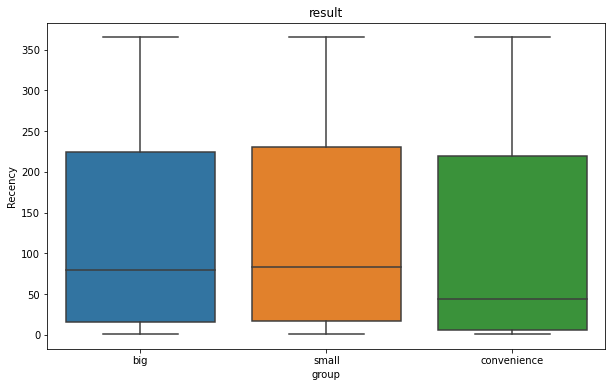

In [55]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "group", y = "Recency", data = df)
plt.xlabel("group")
plt.ylabel("Recency")
plt.title("result")
plt.show()

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

large_df = np.array(list(df_1['Frequency']))
regular_df = np.array(list(df_2['Frequency']))
convenience_df = np.array(list(df['Frequency']))

data = {
    "group" : ["big"] * len(large_df) + ["small"] * len(regular_df) + ["convenience"] * len(convenience_df),
    "Frequency" : np.concatenate([large_df, regular_df, convenience_df]) 
}

df = pd.DataFrame(data)

In [46]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(large_df, regular_df, convenience)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("그룹 간의 평균 차이는 통계적으로 유의미합니다.")
    
else:
    print("그룹 간의 평균 차이는 통계적으로 유의미하지 않습니다.")

F-statistic: 19463.88293782079
p-value: 0.0
그룹 간의 평균 차이는 통계적으로 유의미합니다.


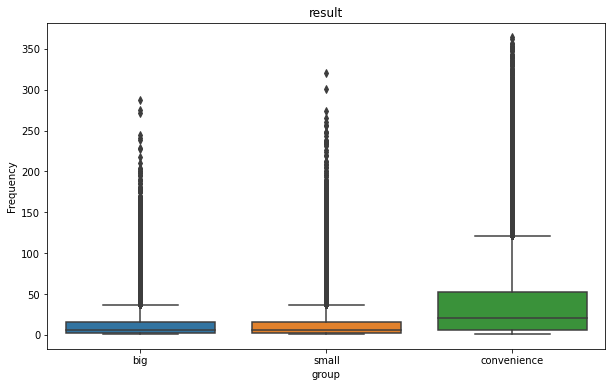

In [49]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "group", y = "Frequency", data = df)
plt.xlabel("group")
plt.ylabel("Frequency")
plt.title("result")
plt.show()

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

large_df = np.array(list(df_1['Monetary']))
regular_df = np.array(list(df_2['Monetary']))
convenience_df = np.array(list(df['Monetary']))

data = {
    "group" : ["big"] * len(large_df) + ["small"] * len(regular_df) + ["convenience"] * len(convenience_df),
    "Monetary" : np.concatenate([large_df, regular_df, convenience_df]) 
}

df = pd.DataFrame(data)

In [61]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(large_df, regular_df, convenience)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("그룹 간의 평균 차이는 통계적으로 유의미합니다.")
    
else:
    print("그룹 간의 평균 차이는 통계적으로 유의미하지 않습니다.")

F-statistic: 6928.653712021943
p-value: 0.0
그룹 간의 평균 차이는 통계적으로 유의미합니다.


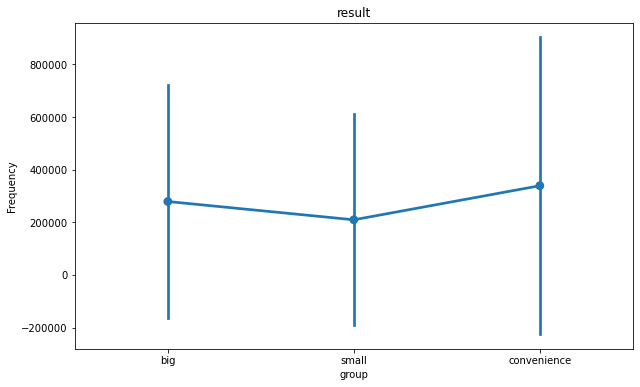

In [63]:
plt.figure(figsize = (10, 6))
sns.pointplot(x = "group", y = "Monetary", data = df, ci = "sd")
plt.xlabel("group")
plt.ylabel("Frequency")
plt.title("result")
plt.show()

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from datetime import datetime
from tqdm import tqdm

df = pd.read_csv("Desktop/rfm_online.csv")

/Users/jjeori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


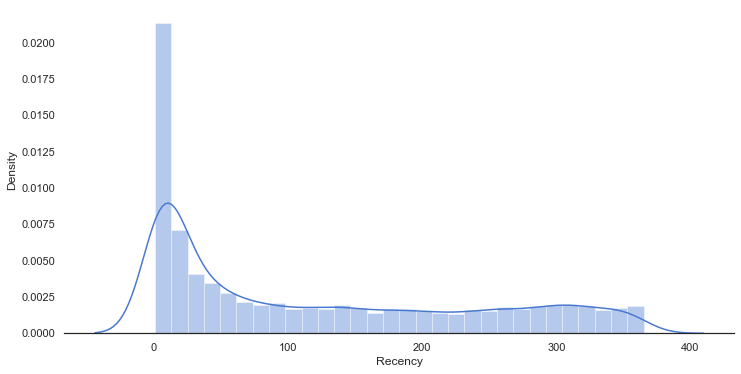

In [141]:
# 시간 차이의 흐름 시각화
sns.set(palette = 'muted', color_codes = True, style = 'white')
fig, ax = plt.subplots(figsize = (12, 6))
sns.despine(left = True)
sns.distplot(df['Recency'], bins = 30)
plt.show()

# 최근 결제 수가 많다는 걸 알 수 있다.

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_3412/1028562607.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_3412/1028562607.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_3412/1028562607.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

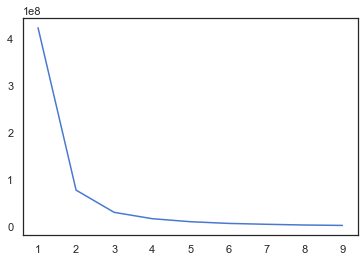

In [142]:
# kmeans 계산하기 위한 elbow point구하기
from sklearn.cluster import KMeans

point = {}
df_recency = df[['Recency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_recency)
    df_recency['cluster'] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.plot(list(point.keys()), list(point.values()))
plt.show()

In [143]:
# 위 그래프를 통해서 elbow point는 4인 지점으로 설정
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df[['Recency']])
df['Recencycluster'] = kmeans.predict(df[['Recency']])

# cluster 분석 모형
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by = target_field_name, ascending = ascending).reset_index(drop = True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on = cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis = 1)
    df_final = df_final.rename(columns = {"index" : cluster_field_name})
    return df_final

df = order_cluster('Recencycluster', 'Recency', df, False)
df.groupby('Recencycluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Recencycluster,,,,,,,,
0,5580.0,314.914695,28.627151,264.0,291.0,314.0,340.0,365.0
1,4912.0,212.763844,30.512730,161.0,186.0,212.0,240.0,263.0
2,5527.0,109.856342,28.372809,64.0,85.0,109.0,135.0,160.0
3,14478.0,18.012916,16.882834,1.0,4.0,12.0,28.0,63.0


/Users/jjeori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


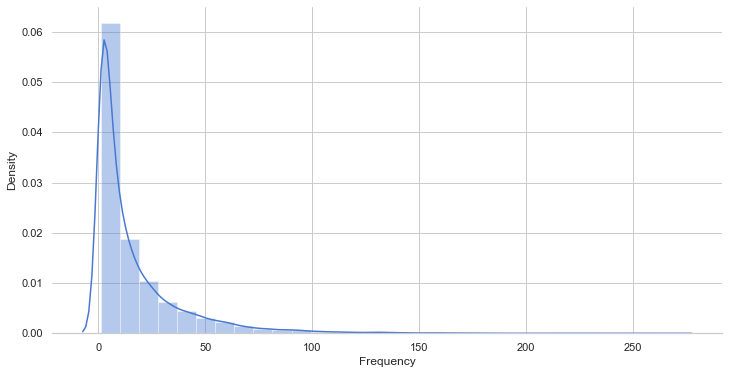

In [144]:
# 구매 빈도의 흐름 시각화
sns.set(palette = 'muted', color_codes = True, style = 'whitegrid')
fig, ax = plt.subplots(figsize = (12, 6))
sns.despine(left = True)
sns.distplot(df['Frequency'], bins = 30)
plt.show()

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_3412/2379556223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_3412/2379556223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_3412/2379556223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

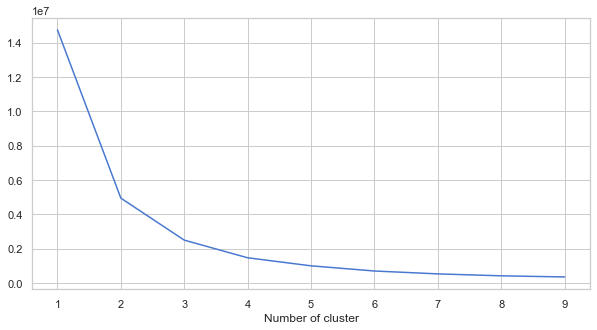

In [134]:
# kmeans 계산하기 위한 elbow point구하기
from sklearn.cluster import KMeans

point = {}
df_frequency = df[['Frequency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_frequency)
    df_frequency['cluster'] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.figure(figsize = (10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel("Number of cluster")
plt.show()

In [145]:
# 위 그래프를 통해서 elbow point는 4인 지점으로 설정
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df[['Frequency']])
df['Frequencycluster'] = kmeans.predict(df[['Frequency']])

df = order_cluster('Frequencycluster', 'Frequency', df, True)
df.groupby('Frequencycluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequencycluster,,,,,,,,
0,20153.0,4.965712,3.842144,1.0,2.0,4.0,8.0,14.0
1,6637.0,23.907488,6.703813,15.0,18.0,23.0,29.0,38.0
2,2976.0,53.669355,11.117684,39.0,44.0,51.0,61.0,80.0
3,731.0,107.905609,26.309603,81.0,89.0,99.0,120.0,269.0


/Users/jjeori/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


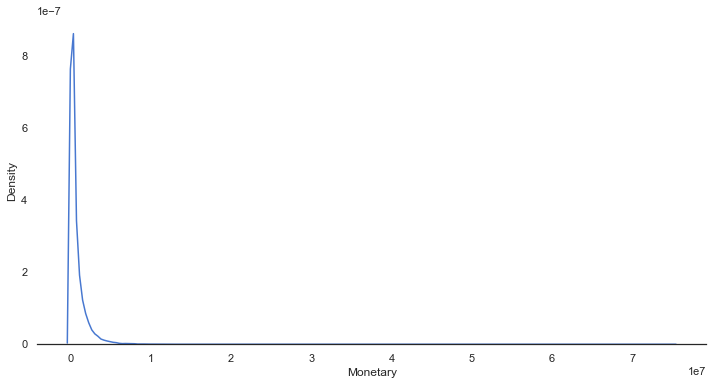

In [136]:
# 구매 빈도의 흐름 시각화
sns.set(palette = 'muted', color_codes = True, style = 'white')
fig, ax = plt.subplots(figsize = (12, 6))
sns.despine(left = True)
sns.distplot(df['Monetary'], hist = False)
plt.show()

/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_3412/1510517582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetary['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_3412/1510517582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetary['cluster'] = kmeans.labels_
/var/folders/c1/3m4yfnr1033cv80bgnw17ly00000gn/T/ipykernel_3412/1510517582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

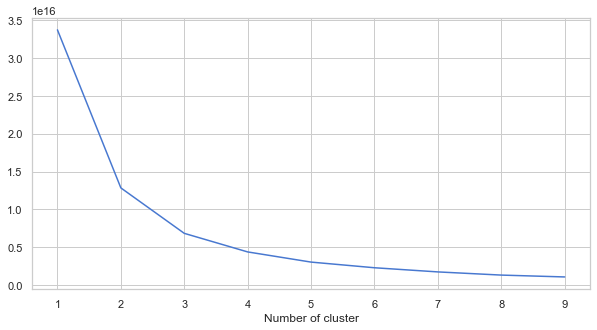

In [146]:
# kmeans 계산하기 위한 elbow point구하기
from sklearn.cluster import KMeans

point = {}
df_monetary = df[['Monetary']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_monetary)
    df_monetary['cluster'] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.figure(figsize = (10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel("Number of cluster")
plt.show()

In [147]:
# 위 그래프를 통해서 elbow point는 4인 지점으로 설정
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df[['Monetary']])
df['Monetarycluster'] = kmeans.predict(df[['Monetary']])

df = order_cluster('Monetarycluster', 'Monetary', df, True)
df.groupby('Monetarycluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
Monetarycluster,,,,,,,,
0,21879.0,2.260921e+05,1.924233e+05,1000.0,65000.0,162000.0,350000.0,728000.0
1,6129.0,1.232367e+06,3.713447e+05,729000.0,913000.0,1160000.0,1512000.0,2067000.0
2,2090.0,2.904660e+06,6.680070e+05,2069000.0,2336500.0,2749000.0,3339000.0,4611000.0
3,399.0,6.313095e+06,2.113694e+06,4614000.0,5036000.0,5648000.0,7001500.0,29720000.0


In [25]:
import pandas as pd

rfm = pd.read_csv("Desktop/RFM 통합.csv", index_col = 0)

In [31]:
rfm[rfm['category'] == '대형마트']

,person_id,Recency,Frequency,Monetary,age_group,person_gender,category,Recencycluster,Frequencycluster,Monetarycluster
39314,00000981c283cfe1fbbab3ed85a1c203,21,4,85000,28,1,대형마트,3,0,0
39315,0000376b90eaaa09394dd9ff9b685347,42,10,179000,28,1,대형마트,3,0,0
39316,0004620a0561bc07f84a249bc8888896,22,9,121000,36,0,대형마트,3,0,0
39317,00150a79b44ff31f8cd37a2689b4966b,19,3,42000,32,0,대형마트,3,0,0
39318,0018545de82f6b606d0b50ec186007e0,29,4,120000,36,0,대형마트,3,0,0
...,...,...,...,...,...,...,...,...,...,...
71794,fd89fd1e3b14908b82f467f8c1d6524a,217,69,2367000,48,0,대형마트,1,2,3
71795,194c03d74bf8a72891b7d2900c68ce94,94,51,2512000,32,0,대형마트,2,2,3
71796,2eecf6fc7c9d943c00364f4974f52b79,82,68,2122000,60,0,대형마트,2,2,3
71797,669e2aaacc1de539ed390ff06c1527ed,133,52,2158000,52,0,대형마트,2,2,3
